<a href="https://colab.research.google.com/github/Avinashkali123/E-commerce/blob/main/E_comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('OR.csv', encoding='latin1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197732 entries, 0 to 197731
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    197732 non-null  object 
 1   StockCode    197732 non-null  object 
 2   Description  196948 non-null  object 
 3   Quantity     197732 non-null  int64  
 4   InvoiceDate  197732 non-null  object 
 5   UnitPrice    197731 non-null  float64
 6   CustomerID   139871 non-null  float64
 7   Country      197731 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.1+ MB


In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df = df[df['Quantity'] > 0]
# Remove canceled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
# Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import datetime as dt

# Reference date (day after last invoice)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,123,1,77183.60
12347.0,43,3,1823.43
12348.0,45,3,1487.24
12350.0,107,1,334.40
12352.0,59,5,1561.81


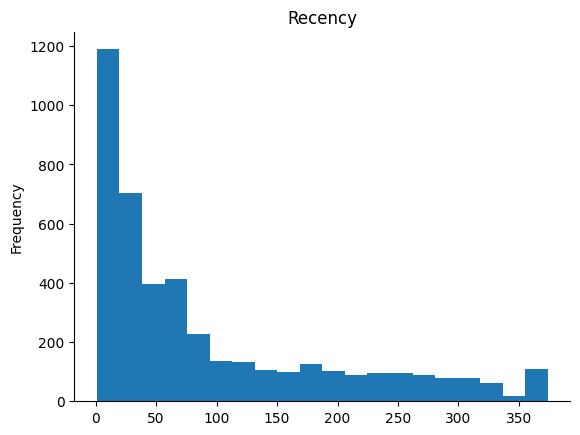

In [ ]:
# @title Recency

from matplotlib import pyplot as plt
rfm['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,123,1,77183.60,1
12347.0,43,3,1823.43,2
12348.0,45,3,1487.24,2
12350.0,107,1,334.40,0
12352.0,59,5,1561.81,2


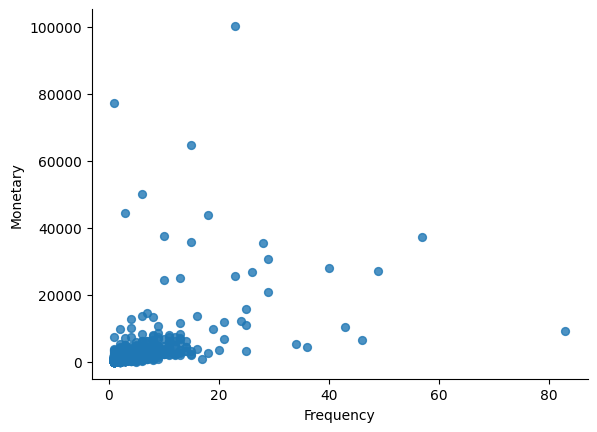

In [ ]:
# @title Frequency vs Monetary

from matplotlib import pyplot as plt
rfm.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)